<a href="https://colab.research.google.com/github/BhavyaShastri/Digit-Recognizer/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
import os
os.mkdir('sdf')

In [ ]:
train_set = torchvision.datasets.MNIST('../../data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.MNIST('../../data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 85015124.04it/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 77353572.05it/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21933068.83it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2568841.53it/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=256,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=256,shuffle=True)

In [ ]:
model = torch.nn.Sequential(
    nn.Linear(784,256),
    nn.Linear(256,128),
    nn.Linear(128,64),
    nn.Linear(64,10)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.05)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Accuray is 0.125
Prediction is 7 
Correct Label is 5


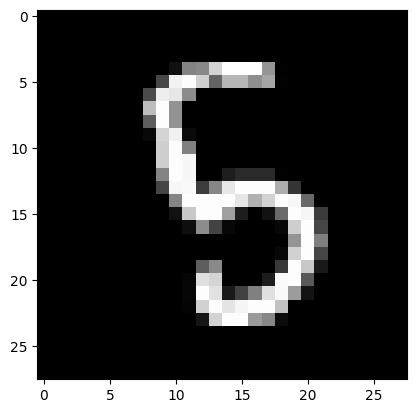

In [ ]:
image,label = next(iter(test_loader))
print(f"Accuray is {accuracy(model(image.reshape(-1,784)),label)}")
output = model(image[0].reshape(-1,784))
img = image[0].repeat(3, 1, 1)
plt.imshow(img.permute(1,2,0))
_,pred = torch.max(output,dim=1)
print(f"Prediction is {pred[0]} \nCorrect Label is {label[0]}")

In [ ]:
num_epochs = 500
prog_bar = tqdm(range(num_epochs))
for epoch in prog_bar:
    images,labels =  next(iter(train_loader))
    images = images.reshape(-1,784)
    output = model(images)
    loss = torch.nn.functional.cross_entropy(output,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    prog_bar.set_description(desc=f"Loss: {loss.item()}")


Loss: 0.3043857216835022: 100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


Accuray is 0.88671875
Prediction is 0 
Correct Label is 0


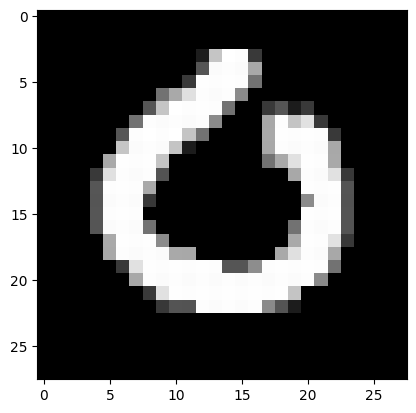

In [ ]:
image,label = next(iter(test_loader))
print(f"Accuray is {accuracy(model(image.reshape(-1,784)),label)}")
a = model(image.reshape(-1,784))
img = image[0].repeat(3, 1, 1)
plt.imshow(img.permute(1,2,0))
_,pred = torch.max(a,dim=1)
print(f"Prediction is {pred[0]} \nCorrect Label is {label[0]}")